# Homework 11: Regression Inference

**Reading**: 
* [Inference for Regression](https://www.inferentialthinking.com/chapters/16/inference-for-regression.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 11 is due **Thursday, December 5th at 11:59pm**. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [125]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from client.api.notebook import Notebook
ok = Notebook('hw11.ok')
_ = ok.auth(inline=True)

Assignment: Homework 11: Regression Inference
OK, version v1.14.15



ERROR  | auth.py:102 | {'error': 'invalid_grant'}



Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: Y8jhPRpkPqCtoPR9bdJOEvxWjeXMUk
Successfully logged in as rga2uz@virginia.edu


## 1. Visual Diagnostics for Linear Regression


### Regression Model Diagnostics
Linear regression isn't always the best way to describe the relationship between two variables. We'd like to develop techniques that will help us decide whether or not to use a linear model to predict one variable based on another.

We will use the insight that if a regression fits a set of points well, then the residuals from that regression line will show no pattern when plotted against the predictor variable. 

The table below contains information about crime rates and median home values in suburbs of Boston. We will attempt to use linear regression to predict median home value in terms of crime rate.

#### About the dataset
All data are from 1970.  Crime rates are per capita per year; home values are in thousands of dollars.  The crime data come from the FBI, and home values are from the US Census Bureau.  

Run the next cell to load the data and see a scatter plot.

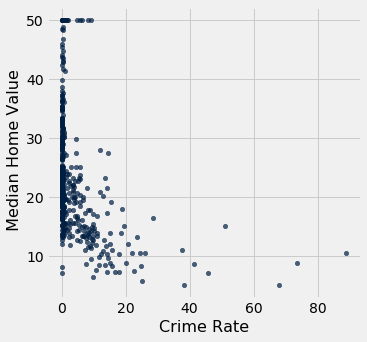

In [126]:
boston = Table.read_table('boston_housing.csv')
boston.scatter('Crime Rate')

<div class="hide">\pagebreak</div>

#### Question 1

Write a function called `residuals`.  It should take a single argument, a table.  It should first compute the slope and intercept of the regression line that predicts the second column of that table (accessible as `tbl.column(1)`) using the first column (`tbl.column(0)`). The function should return an array containing the *residuals* for that regression line. Recall that residuals are given by 

$$residual = observed \ value - regression \ estimate$$

Hint: If your code is getting long, think about how you can split the problem up into multiple smaller, simpler functions.

In [127]:
def residuals(tbl):
    x_values = tbl.column(0)
    y_values = tbl.column(1)
    
    x_standard = (x_values - np.mean(x_values)) / np.std(x_values)
    y_standard = (y_values - np.mean(y_values)) / np.std(y_values)
    
    r = np.mean(x_standard * y_standard)
    
    slope = r * (np.std(y_values) / np.std(x_values))
    intercept = np.mean(y_values) - (slope * np.mean(x_values))
    
    regression_estimates = (slope * x_values) + intercept
    residual_array = y_values - regression_estimates
    
    return residual_array


In [128]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>

#### Question 2

Make a scatter plot of the residuals for the Boston housing dataset against crime rate. Crime rate should be on the horizontal axis.

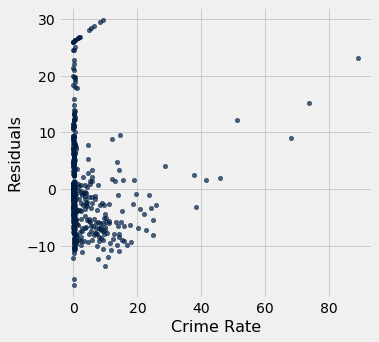

In [131]:
boston.with_column("Residuals", residuals(boston)).scatter("Crime Rate", "Residuals")

<div class="hide">\pagebreak</div>

#### Question 3

Does the plot of residuals look roughly like a formless cloud, or is there some kind of pattern? Are they centered around 0?

The plot of residuals is not entirely formless. Where the crime rate is 0, the residuals appear roughly symmetrical above and below (centered at) 0. But as the crime rate increases to 20, nearly all the residuals are negative. Above 40, all residuals are positive, although there are fewer. The fit_line is horizontal, with zero slope, at residual of 0, which would indicate that the residuals are centered around 0, but linear regression still may not be the best approach to prediciting median home value from crime rate.

<div class="hide">\pagebreak</div>

#### Question 4

Does it seem like a linear model is appropriate for describing the relationship between crime and median home value?

Assign `linear` to `True` if a linear model is appropriate for describing the relationship, and `False` if it is not.

In [132]:
linear = False

In [133]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Section [15.6](https://www.inferentialthinking.com/chapters/15/6/numerical-diagnostics.html) of the textbook describes some mathematical facts that hold for all regression estimates, regardless of goodness of fit.  One fact is that there is a relationship between the standard deviation of the residuals, the standard deviation of the response variable, and the correlation.  Let us test this.

<div class="hide">\pagebreak</div>

#### Question 5

Directly compute the standard deviation of the residuals from the Boston data.  Then compute the same quantity without using the residuals, using the formula described in section 15.6 [here](https://www.inferentialthinking.com/chapters/15/6/Numerical_Diagnostics.html#sd-of-the-residuals) instead.

In [134]:
# direct computation: built-in np.std on residuals array returned from function call
boston_residual_sd = np.std(residuals(boston))

# formula: SD of residuals = sqrt(1 - r^2)*(SD of y)
boston_r = np.mean( ((boston[0] - np.mean(boston[0]))/np.std(boston[0])) * ((boston[1] - np.mean(boston[1]))/ np.std(boston[1])) )
boston_residual_sd_from_formula = np.sqrt(1 - (boston_r ** 2)) * np.std(boston[1])

print("Residual SD: {0}".format(boston_residual_sd))
print("Residual SD from the formula: {0}".format(boston_residual_sd_from_formula))

Residual SD: 8.474144781120948
Residual SD from the formula: 8.474144781120948


In [135]:
_ = ok.grade('q1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Below, we have imported a new table, the Old Faithful data.

In [136]:
old_faithful = Table.read_table('faithful.csv')
old_faithful

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


The following cell makes a residual plot for this new dataset.

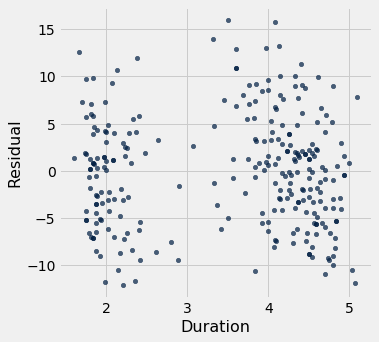

In [137]:
Table().with_columns('Residual', residuals(old_faithful), 'Duration', old_faithful.column('duration')).scatter('Duration')

<div class="hide">\pagebreak</div>

#### Question 6

Repeat the procedure from Question 5 to find the standard deviation of the residuals for the `old_faithful` dataset.

In [138]:
faithful_residual_sd = np.std(residuals(old_faithful))

faithful_r = np.mean( ((old_faithful[0] - np.mean(old_faithful[0]))/np.std(old_faithful[0])) * ((old_faithful[1] - np.mean(old_faithful[1]))/ np.std(old_faithful[1])) )
faithful_residual_sd_from_formula = np.sqrt(1 - (faithful_r ** 2)) * np.std(old_faithful[1])

print("Residual SD: {0}".format(faithful_residual_sd))
print("Residual SD from the formula: {0}".format(faithful_residual_sd_from_formula))

Residual SD: 5.892226635893954
Residual SD from the formula: 5.892226635893948


In [139]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Finding the Least Squares Regression Line


In this exercise, you'll work with a small invented data set.  Run the next cell to generate the dataset `d` and see a scatter plot.

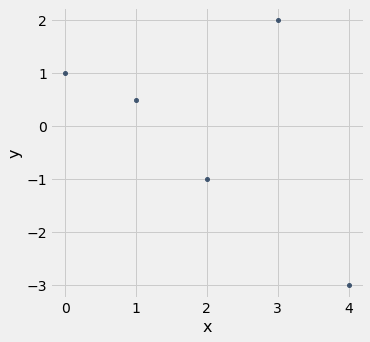

In [140]:
d = Table().with_columns(
    'x', make_array(0,  1,  2,  3,  4),
    'y', make_array(1, .5, -1,  2, -3))
d.scatter('x')


#### Question 1 (Ungraded, but you'll need the result later)
Running the cell below will generate sliders that control the slope and intercept of a line through the scatter plot.  When you adjust a slider, the line will move.

By moving the line around, make your best guess at the least-squares regression line.  (It's okay if your line isn't exactly right, as long as it's reasonable.)

**Note:** Python will probably take about a second to redraw the plot each time you adjust the slider.  We suggest clicking the place on the slider you want to try and waiting for the plot to be drawn; dragging the slider handle around will cause a long lag.

In [47]:
def plot_line(slope, intercept):
    plt.figure(figsize=(5,5))
    
    endpoints = make_array(-2, 7)
    p = plt.plot(endpoints, slope*endpoints + intercept, color='orange', label='Proposed line')
    
    plt.scatter(d.column('x'), d.column('y'), color='blue', label='Points')
    
    plt.xlim(-4, 8)
    plt.ylim(-6, 6)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.legend(bbox_to_anchor=(1.8, .8))
    plt.show()

interact(plot_line, slope=widgets.FloatSlider(min=-4, max=4, step=.1), intercept=widgets.FloatSlider(min=-4, max=4, step=.1));

interactive(children=(FloatSlider(value=0.0, description='slope', max=4.0, min=-4.0), FloatSlider(value=0.0, d…

<div class="hide">\pagebreak</div>

You can probably find a reasonable-looking line by just eyeballing it.  But remember: the least-squares regression line minimizes the mean of the squared errors made by the line for each point.  Your eye might not be able to judge squared errors very well.

#### A note on mean and total squared error

It is common to think of the least-squares line as the line with the least *mean* squared error (or the square root of the mean squared error), as the textbook does.

But it turns out that it doesn't matter whether you minimize the mean squared error or the *total* squared error.  You'll get the same best line in either case.

That's because the total squared error is just the mean squared error multipled by the number of points (`d.num_rows`).  So if one line gets a better total squared error than another line, then it also gets a better mean squared error.  In particular, the line with the smallest total squared error is also better than every other line in terms of mean squared error.  That makes it the least squares line.

**tl; dr:** Minimizing the mean squared error minimizes the total squared error as well.

#### Question 2 (Ungraded, but you'll need the result later)
The next cell produces a more useful plot.  Use it to find a line that's closer to the least-squares regression line, keeping the above note in mind.

In [53]:
def plot_line_and_errors(slope, intercept):
    plt.figure(figsize=(5,5))
    points = make_array(-2, 7)
    p = plt.plot(points, slope*points + intercept, color='orange', label='Proposed line')
    ax = p[0].axes
    
    predicted_ys = slope*d.column('x') + intercept
    diffs = predicted_ys - d.column('y')
    for i in np.arange(d.num_rows):
        x = d.column('x').item(i)
        y = d.column('y').item(i)
        diff = diffs.item(i)
        
        if diff > 0:
            bottom_left_x = x
            bottom_left_y = y
        else:
            bottom_left_x = x + diff
            bottom_left_y = y + diff
        
        ax.add_patch(patches.Rectangle(make_array(bottom_left_x, bottom_left_y), abs(diff), abs(diff), color='red', alpha=.3, label=('Squared error' if i == 0 else None)))
        plt.plot(make_array(x, x), make_array(y, y + diff), color='red', alpha=.6, label=('Error' if i == 0 else None))
    
    plt.scatter(d.column('x'), d.column('y'), color='blue', label='Points')
    
    plt.xlim(-4, 8)
    plt.ylim(-6, 6)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.legend(bbox_to_anchor=(1.8, .8))
    plt.show()

interact(plot_line_and_errors, slope=widgets.FloatSlider(min=-4, max=4, step=.1), intercept=widgets.FloatSlider(min=-4, max=4, step=.1));

interactive(children=(FloatSlider(value=0.0, description='slope', max=4.0, min=-4.0), FloatSlider(value=0.0, d…

#### Question 3
Describe the visual criterion you used to find a line in question 2. How did you judge whether one line was better than another? 

For example, a possible (but incorrect) answer is, "I tried to make the red line for the bottom-right point as small as possible."

I tried to make the total combined area of the squared error rectangles as small as possible. Basically, the less shaded red space on the graph, the better.

#### Question 4
We can say that a point influences the line by how much the line would move if the point were removed from the data set. Does the outlier at (3, 2) have more or less influence than any other point on the resulting best-fit line? 

Assign `more_influence` to `True` if the outlier (3,2) has more influence than any other point on the best-fit line, or `False` if it does not.

In [141]:
more_influence = True 

In [142]:
_ = ok.grade('q2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now, let's have Python find this line for us.  When we use `minimize`, Python goes through a process similar to the one you might have used in question 2.

But Python can't look at a plot that displays errors!  Instead, we tell it how to find the total squared error for a line with a given slope and intercept.

#### Question 5
Define a function called `total_squared_error`.  It should take two numbers as arguments:

1. the slope of some potential line
2. the intercept of some potential line

It should return the total squared error when we use that line to make predictions for the dataset `d`.

Recall that `d` has two columns: _x_ and _y_.

In [145]:
def total_squared_error(slope, intercept):
    predictions = (slope * d[0]) + intercept
    errors = d[1] - predictions
    return np.mean(errors ** 2) * d.num_rows 

In [146]:
_ = ok.grade('q2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 6
What is the total squared error for the line you found by "eyeballing" the errors in Question 1?  What about Question 2, where you made a guess that was "aided" by a visualization of the squared error?  (It's okay if the error went up, but for many students, the error will go down when using the visual aid.)

In [148]:
eyeballed_error = total_squared_error(-1.1, 2)
aided_error = total_squared_error(-.8, 1.2)
print("Eyeballed error:", eyeballed_error, "\nAided error:", aided_error)

Eyeballed error: 13.05 
Aided error: 11.650000000000002


In [149]:
_ = ok.grade('q2_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 7
Use `minimize` to find the slope and intercept for the line that minimizes the total squared error. This is the definition of a least-squares regression line. 

**Note:** `minimize` will return a single array containing the slope as the first element and intercept as the second. Read more of its documentation [here](http://data8.org/datascience/util.html?highlight=minimize#datascience.util.minimize) or an example of its use [here](https://www.inferentialthinking.com/chapters/15/3/method-of-least-squares.html).

In [150]:
# The staff solution used 1 line of code above here.
slope_from_minimize = minimize(total_squared_error)[0]
intercept_from_minimize = minimize(total_squared_error)[1]
print("Least-squares regression line: predicted_y =",
      slope_from_minimize,
      "* x + ",
      intercept_from_minimize)

Least-squares regression line: predicted_y = -0.649837423157039 * x +  1.1988619620992733


In [151]:
_ = ok.grade('q2_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 8
What is the total squared error for the least-squares regression line that you found?

In [152]:
best_total_squared_error = total_squared_error(slope_from_minimize, intercept_from_minimize)
best_total_squared_error

10.975003568216033

In [153]:
_ = ok.grade('q2_8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Finally, run the following cell to plot this "best fit" line and its errors:

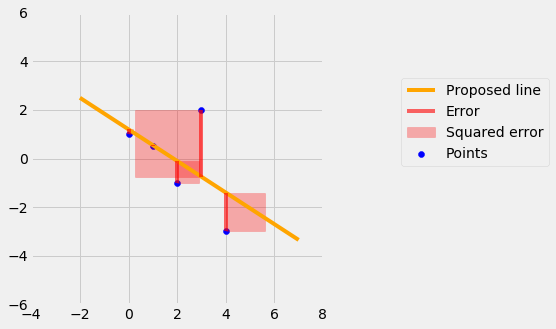

In [154]:
plot_line_and_errors(slope_from_minimize, intercept_from_minimize)

## 3. Quantifying Sampling Errors in Regression


Previously, in this class we've used confidence intervals to quantify uncertainty about estimates as well as to test predictions. To run a hypothesis test using a confidence interval, we use the following procedure:
1. Formulate a null hypothesis
2. Formulate an alternative hypothesis 
3. Choose a test statistic and compute the observed value for the test statistic
4. Bootstrap, finding a value of the test stat for each resample
5. Generate a 95% confidence interval from those resampled test stats
6. Based on whether your value is in an interval, make a conclusion

Another thing we've covered recently is the use of linear regression to make predictions, using correlated variables. An example is, say, predicting the height of children based on the heights of their parents.

We can combine these two topics together in order to make even more powerful statements about our population given just a sample as before. We can use the following techniques to do so:
- Bootstrapped interval for the true slope
- Bootstrapped prediction interval for y (given a particular value of x)

This homework further explores these two advanced methods.

Recall the Old Faithful dataset from our lab on regression. The table contains two pieces of information about each eruption of the Old Faithful geyser in Yellowstone National Park:
1. The duration of the eruption, in minutes.
2. The time between this eruption and the next eruption (the "waiting time"), in minutes.

The dataset is plotted below along with its line of best fit.

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


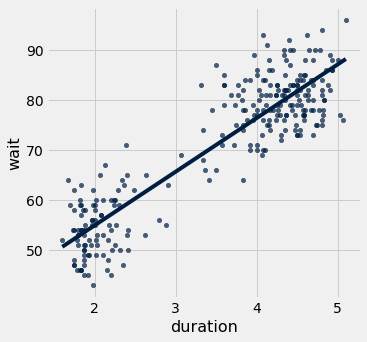

In [155]:
faithful = Table.read_table('faithful_inference.csv')
faithful.scatter('duration', fit_line=True)
faithful

### Finding the Bootstrap Confidence Interval for the True Slope

Last time we looked at this dataset, we noticed the apparent linear relationship between duration and wait, and we decided to use regression to predict wait in terms of duration. However, our data are just a sample of all the eruptions that have happened at Old Faithful. As we know, relationships can appear in a sample that don't really exist in the population from which the sample was taken.

#### Question 1

Before we move forward using our linear model, we would like to know whether or not there truly exists a relationship between duration and wait time. If there is no relationship between the two, then we'd expect a correlation of 0, which would give us a slope of 0. Now, write in null and alternative hypotheses, based on your knowledge of hypothesis tests you've conducted in the past.

- **Null Hypothesis:** There is no correlation between duration and wait time; the slope of the true line is 0.
- **Alternate Hypothesis:** There is a correlation between duration and wait time; the slope of the true line is not 0.

We will use the method of confidence intervals to test this hypothesis.

<div class="hide">\pagebreak</div>

#### Question 2

We'll warm up by implementing some familiar functions. You may use these functions throughout this assignment. Start by defining these two functions:

1. `standard_units` should take in an array of numbers and return an array containing those numbers converted to standard units.
2. `correlation` should take in a table with 2 columns and return the correlation between these columns. Hint: you may want to use the `standard_units` function you defined above.

In [156]:
def standard_units(arr):
    return (arr - np.mean(arr)) / np.std(arr)

def correlation(tbl):
    return np.mean(standard_units(tbl[0]) * standard_units(tbl[1]))

In [157]:
_ = ok.grade('q3_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>

#### Question 3

Using the functions you just implemented, create a function called `fit_line`.  It should take a table as its argument.  It should return an array containing the slope and intercept of the regression line that predicts the second column in the table using the first.

In [158]:
def fit_line(tbl):
    
    slope = correlation(tbl) * (np.std(tbl[1]) / np.std(tbl[0]))
    intercept = np.mean(tbl[1]) - slope * np.mean(tbl[0])
    return make_array(slope, intercept)

# This should compute the slope and intercept of the regression
# line predicting wait time from duration in the faithful dataset.
fit_line(faithful)

array([10.7296414 , 33.47439702])

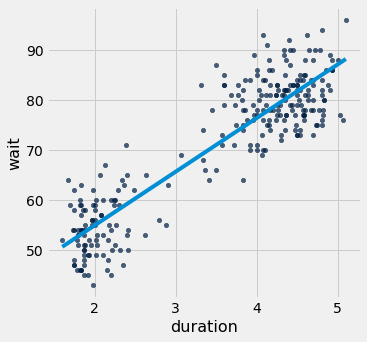

In [159]:
# Ensure your fit_line function fits a reasonable line 
# to the data in faithful, using the plot below

slope, intercept = fit_line(faithful)
faithful.scatter(0)
plt.plot([min(faithful[0]), max(faithful[0])], 
         [slope*min(faithful[0])+intercept, slope*max(faithful[0])+intercept])
plt.show()

In [79]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now we have all the tools we need in order to create a confidence interval quantifying our uncertainty about the true relationship between duration and wait time.

<div class="hide">\pagebreak</div>

#### Question 4

Use the bootstrap to compute 1000 resamples from our dataset. For each resample, compute the slope of the best fit line. Put these slopes in an array called `resample_slopes`, giving you the empirical distribution of regression line slopes in resamples. Plot a histogram of these slopes.

In [96]:
resample_slopes = make_array()

for i in np.arange(1000):
    sample_slope = fit_line(faithful.sample(faithful.num_rows, with_replacement = True))[0]
    resample_slopes = np.append(resample_slopes, sample_slope)


<div class="hide">\pagebreak</div>

#### Question 5

Use your resampled slopes to construct an approximate 95% confidence interval for the true value of the slope.

In [97]:
lower_end = percentile(2.5, resample_slopes)
upper_end = percentile(97.5, resample_slopes)
print("95% confidence interval for slope: [{:g}, {:g}]".format(lower_end, upper_end))

95% confidence interval for slope: [10.1254, 11.3168]


In [98]:
_ = ok.grade('q3_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>

#### Question 6

Based on your confidence interval, would you accept or reject the null hypothesis that the true slope is 0?  Why?  What P-value cutoff are you using?

A confidence interval of 95% implies a p-value cutoff of 0.05. We would reject the null hypothesis that the true slope is 0 because this value falls outside of our confidence interval.

### Finding the Bootstrap Prediction Interval

Suppose we're tourists at Yellowstone, and we'd like to know how long we'll have to wait for the next Old Faithful eruption.  We decide to use our regression line to make some predictions for the waiting times.  But just as we're uncertain about the slope of the true regression line, we're also uncertain about the predictions we'd make based on the true regression line.

<div class="hide">\pagebreak</div>

#### Question 7

Define the function `fitted_value`.  It should take 2 arguments:

1. A table with 2 columns.  We'll be predicting the values in the second column using the first.
2. A number, the value of the predictor variable for which we'd like to make a prediction.

Make sure to use your `fit_line` function. 

In [105]:
def fitted_value(table, given_x):
    m_and_b = fit_line(table)
    return m_and_b[0] * given_x + m_and_b[1]

# Here's an example of how fitted_value is used.  This should
# compute the prediction for the wait time of an eruption that lasts 
# two minutes .
two_minutes_wait = fitted_value(faithful, 2)
two_minutes_wait

54.933679813020404

In [106]:
_ = ok.grade('q3_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>

#### Question 8

The park ranger tells us that the most recent eruption lasted 6 minutes. Using your function above, assign the variable `most_recent_wait` to the predicted wait time. 

In [111]:
most_recent_wait = fitted_value(faithful, 6)
most_recent_wait

97.85224539355451

In [112]:
_ = ok.grade('q3_8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Juan, a fellow tourist, raises the following objection to your prediction:

> "Your prediction depends on your sample of 272 eruptions.  Couldn't your prediction have been different if you had happened to have a different sample of eruptions?"

Having read section [16.3](https://www.inferentialthinking.com/chapters/16/3/prediction-intervals.html) of the textbook, you know just the response!

<div class="hide">\pagebreak</div>

#### Question 9

Define the function `bootstrap_lines`.  It should take two arguments:
1. A table with two columns.  As usual, we'll be predicting the second column using the first.
2. An integer, a number of bootstraps to run.

It should return a *table* whose first column, `"Slope"`, contains the given number of bootstrapped slopes, and whose second column, `"Intercept"`, contains the corresponding bootstrapped intercepts.  Each slope and intercept should come from a regression line that predicts column 2 from column 1 of a resample of the given table.  The table should have 1 row for each bootstrap replication.

In [116]:
def bootstrap_lines(tbl, num_bootstraps):
    
    boot_slopes = make_array()
    boot_intercepts = make_array()
    
    for i in np.arange(num_bootstraps):
        
        resampled_faith = tbl.sample(tbl.num_rows, with_replacement = True)
        params = fit_line(resampled_faith)
        
        sample_slope = params[0]
        sample_intercept = params[1]
        
        boot_slopes = np.append(boot_slopes, sample_slope)
        boot_intercepts = np.append(boot_intercepts, sample_intercept)
        
    return Table().with_columns("Slope", boot_slopes, "Intercept", boot_intercepts)

        
        
        

# When you're done, this code should produce the slopes
# and intercepts of 1000 regression lines computed from
# resamples of the faithful table.
regression_lines = bootstrap_lines(faithful, 1000)
regression_lines

Slope,Intercept
10.7348,33.1448
10.2421,35.356
10.4082,34.1829
11.382,31.2386
10.7874,32.3452
11.0273,32.664
10.6728,33.7424
10.7173,33.6429
10.7077,33.5045
10.8606,33.6087


<div class="hide">\pagebreak</div>

#### Question 10

Create an array called `predictions_for_six`.  It should contain 1000 numbers.  Each number should be the predicted waiting time after an eruption with a duration of 6 minutes, using a different bootstrapped regression line. Hint: use `regression_lines` from the previous questions.

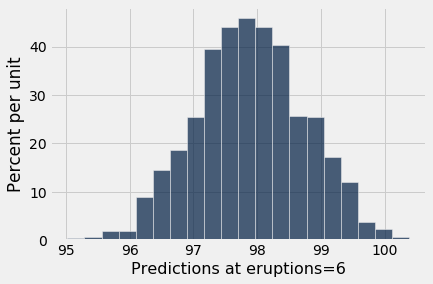

In [117]:
predictions_for_six = (regression_lines[0] * 6) + regression_lines[1]

# This will make a histogram of your predictions:
table_of_predictions = Table().with_column('Predictions at eruptions=6', predictions_for_six)
table_of_predictions.hist('Predictions at eruptions=6', bins=20)

<div class="hide">\pagebreak</div>

#### Question 11

Create a 95 percent confidence interval for these predictions.

In [119]:
lower_bound = percentile(2.5, predictions_for_six)
upper_bound = percentile(97.5, predictions_for_six)

print('95% Confidence interval for predictions for x=6: (', lower_bound,",", upper_bound, ')')

95% Confidence interval for predictions for x=6: ( 96.24599322366866 , 99.4835548102886 )


In [120]:
_ = ok.grade('q3_11')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>

#### Question 12

Look at the scatter plot of the data at the start of this exercise. 
Determine which of the following are true, then set `question_12_choice` to a list consisting of the numbers of statements that are true. For example, if you think that 1 and 2 are true but 3 is false, you'd assign `question_12_choice` to be an array consisting of the values 1 and 2.

Statement 1: This confidence covers 95 percent of waiting times of eruptions in `faithful` that had an eruption duration of 6 minutes.

Statement 2: This interval gives a sense of how much actual wait times differ from your prediction.

Statement 3: The confidence interval quantifies our uncertainty in our estimate of what the true regression line would predict.

In [165]:
question_12_choice =[3]

In [166]:
_ = ok.grade('q3_12')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 4. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [123]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw11.ipynb'.
Submit... 100% complete
Submission successful for user: rga2uz@virginia.edu
URL: https://okpy.org/uva/stat_1602/fa19/hw11/submissions/mqjB5A



In [124]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t